In [1]:
import numpy as np
import cv2
print cv2.__version__
import matplotlib.pyplot as pyplot
%matplotlib inline
# to show as a separate window - check for windows
# %matplotlib tk 
import skimage.filters
import skimage.io as skio
import os
import time

2.4.11


In [2]:
# to check which python you are currently running
import platform
print(platform.python_version())

2.7.13


In [3]:
# read the video

cap = cv2.VideoCapture('./2017_10_05/moth3_1_trial59.avi')

length = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.cv.CV_CAP_PROP_FPS)

print length, width, height, fps
cap.release()

364 648 488 30.0


In [4]:
# def load_all_images():
cap = cv2.VideoCapture('./2017_10_05/moth3_1_trial59.avi')
imgs = []
ret = True
ff=0

for ff in range(length):
    # Capture frame-by-frame
    ret, frame = cap.read()
    imgs.append(frame)
    print(ret)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [5]:
imgs_array = np.asarray(imgs)

In [6]:
type(imgs_array)

numpy.ndarray

In [7]:
imgs_array.shape

(364L, 488L, 648L)

In [ ]:
# median_blank=np.median(imgs_array[149:151,:,:], axis=0)
# type(median_blank)
# median_blank.shape

# look at the reference frame
pyplot.subplot(1, 2, 1)
pyplot.imshow(imgs_array[201,:,:], cmap='gray')
pyplot.title('Blank Frame')

pyplot.subplot(1,2,2)
filtered_reference = skimage.filters.gaussian(imgs_array[201,:,:], sigma=.5)
pyplot.imshow(filtered_reference, cmap = 'gray')
pyplot.title('filtered reference')
#pyplot.hist(Frame_one.ravel(), bins = 256)

pyplot.show()

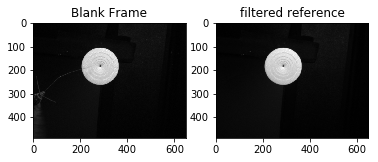

In [16]:
# load reference frame

imgFile = cv2.imread('./2017_10_05/moth3_1background.png', cv2.IMREAD_GRAYSCALE)

pyplot.subplot(1, 2, 1)
pyplot.imshow(imgs_array[201,:,:], cmap='gray')
pyplot.title('Blank Frame')

pyplot.subplot(1,2,2)
filtered_reference = skimage.filters.gaussian(imgFile, sigma=.5)
pyplot.imshow(filtered_reference, cmap = 'gray')
pyplot.title('filtered reference')

pyplot.show()

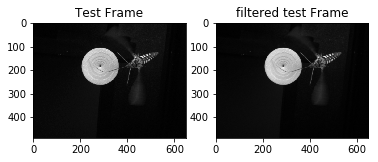

In [17]:
# look at some random frame in the video

fnum=80
pyplot.subplot(1, 2, 1)
pyplot.imshow(imgs_array[fnum,:,:], cmap='gray')
pyplot.title('Test Frame')

pyplot.subplot(1,2,2)
filtered_frame = skimage.filters.gaussian(imgs_array[fnum,:,:], sigma=.5)
pyplot.imshow(filtered_frame, cmap = 'gray')
pyplot.title('filtered test Frame')

pyplot.show()

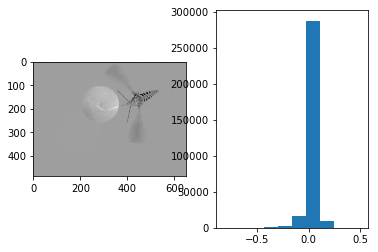

In [18]:
# look at the subtracted frame and look at the pixel intensity histogram
frame_subtract = filtered_reference - filtered_frame
pyplot.subplot(121)
pyplot.imshow(frame_subtract, cmap='gray')
pyplot.subplot(122)
pyplot.hist(frame_subtract.ravel())

pyplot.show()

In [29]:
# calculate the 95 percentile to use as a threshold
pixelVal=frame_subtract.ravel()
p = np.percentile(pixelVal, 99)
print p

0.155842231339


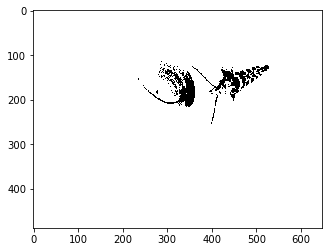

In [30]:
# use otsu_thresholding method
# threshold_value = skimage.filters.threshold_otsu(frame_subtract)
# threshold_value

#  using a simple percentile cutoff on the pixel value histogram seems to be working better
binary = abs(frame_subtract) < p

pyplot.imshow(binary, cmap='gray')
pyplot.show()

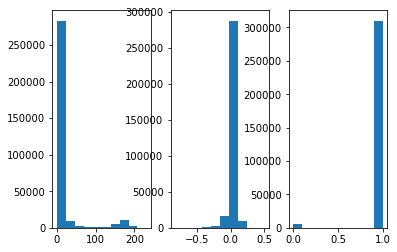

In [31]:
pyplot.subplot(131)
pyplot.hist(imgs_array[fnum,:,:].ravel())
pyplot.subplot(132)
pyplot.hist(frame_subtract.ravel())
pyplot.subplot(133)
pyplot.hist(binary.ravel())
pyplot.show()

In [32]:
def transformation(X):
    # normalizes a range of pixels to 0-255
#     X=np.array([-10, -4, -6, 0, 2, 3, 4, 5, 6, 10])
    m = X.min()
    X_transformed = (X - X.min()) * 255.0/np.ptp(X)
    return X_transformed

In [33]:
def histogramBasedThreshold():
    Final_imgs = [ ]
    ctr = 0
    length=len(imgs_array)
    for ff in range(length):    
        filtered_frame = skimage.filters.gaussian(imgs_array[ff,:,:], sigma=.5)
        
        # Subtract each frame from the reference frame
        frame_subtract = filtered_frame - filtered_reference
        # scale the pixel values to 0-255
        frame_subtr_trans = transformation(frame_subtract)

    
        # Calculate the 95th percentile for the pixel intensity histogram   
        pixelVal=frame_subtract.ravel()
        p = np.percentile(pixelVal, 97.0)
        binary = abs(frame_subtract) < p
        # convery the binary to 0 and 255
        binary_trans = binary * 255.0
        print ctr
        meta = np.concatenate((imgs_array[ff,:,:], frame_subtr_trans, binary_trans), axis=1)
        
        Final_imgs.append(meta)
        ctr +=1
    Concat_frames = np.asarray(Final_imgs)
    return Concat_frames

In [34]:
bla = histogramBasedThreshold()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

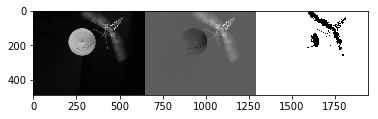

(364L, 488L, 1944L)

In [35]:
pyplot.imshow(bla[26,:,:], cmap='gray')
pyplot.show()
bla.shape

In [36]:
length = len(bla)
type(length)

int

In [ ]:
# to open another test console 
%qtconsole

In [51]:
# write photos to a directory in desk
ctr = 0
photoDir = "C:\\Users\\Tanvi\\Documents\\Tom Daniel lab\\testBehaviorAnalysis\\2017_10_05\\"

# make directory, if it doesn't exist
if not os.path.exists(photoDir):
    os.makedirs(photoDir)

for ff in range(len(bla)):
    img2 = bla[ff,:,:]
    cv2.imwrite(photoDir + str(ctr).zfill(4) + '.png', img2)
    print(ff)
    ctr += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [53]:
# convert images to video with ffmpeg
os.chdir(photoDir)

In [ ]:
# use ffmpeg to convert directory to video
# -r is output frame rate
stta = time.time()
!ffmpeg -r 10 -i %04d.png -c:v libx264 -pix_fmt yuv420p -y TestSegmentation_moth3_1_trial59.avi.mp4
print time.time() - stta # time the video writingos.chdir("../")

In [ ]:
test=os.listdir(photoDir)

for item in test:
    if item.endswith(".png"):
        os.remove(item)

In [42]:
cwd = os.getcwd()
print(cwd)

C:\Users\Tanvi\Google Drive\Tom-Tanvi\Video Analysis


In [ ]:
# ffmpeg -start_number 0 -i "%04d.png" -c:v libx264 -r 30 -pix_fmt yuv420p out.mp4

In [ ]:
# to go back up one folder
os.chdir('../')